In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('airline_passengers.csv')

In [3]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Month                    144 non-null    object
 1   Thousands of Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
df['Month'] = pd.to_datetime(df['Month'])

In [6]:
# Setting the date column as the index for the dataset
df.set_index('Month', inplace=True)

In [7]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

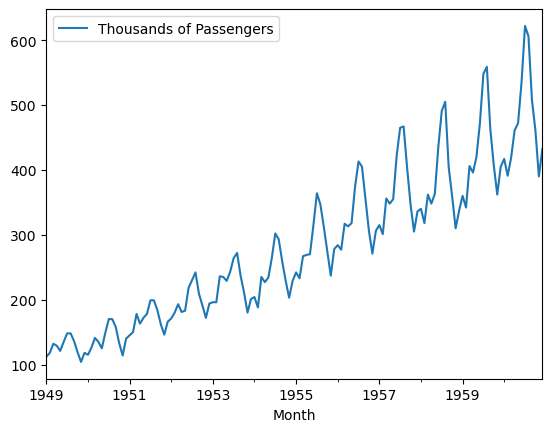

In [8]:
df.plot()

### Checking for other components like Trend, Seasonality, Irregularity/Error using seasonal_decompose library for both additive nad mutiplicative models

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
additive_decompose = seasonal_decompose(df['Thousands of Passengers'], model = 'additive', period=12)
multiplicative_decompose = seasonal_decompose(df['Thousands of Passengers'], model = 'multplicative', period=12)

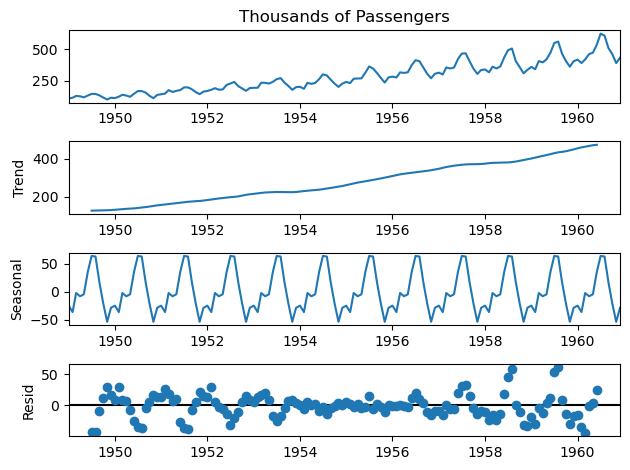

In [10]:
additive_decompose.plot()
plt.show()

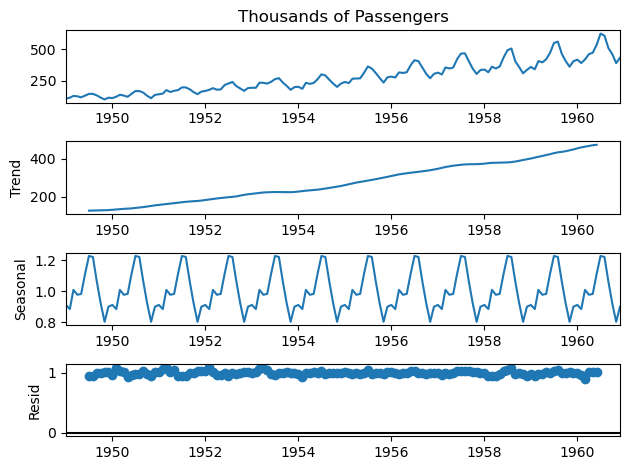

In [11]:
multiplicative_decompose.plot()
plt.show()

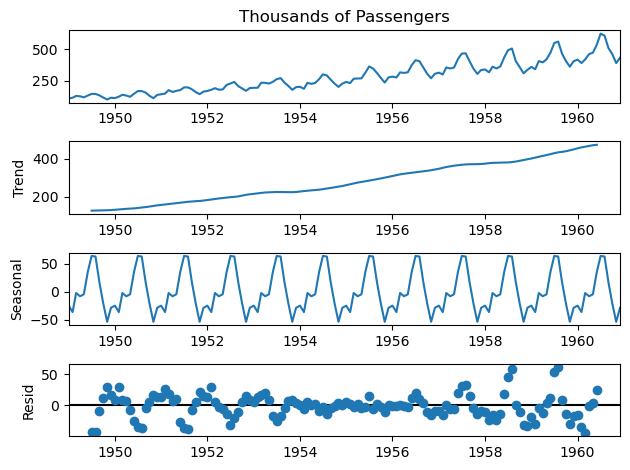

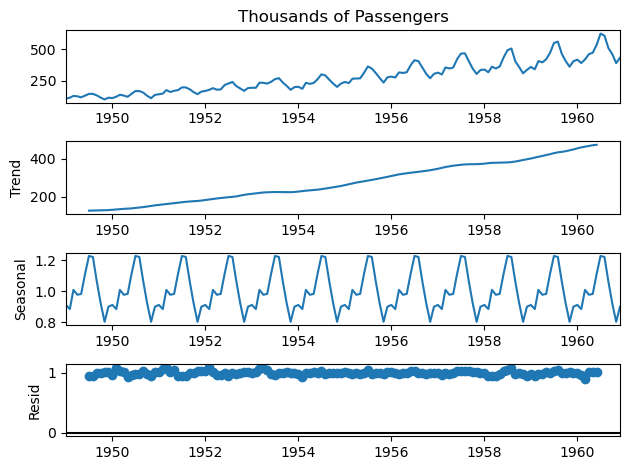

In [12]:
# Checking for the autocorrelation using Durbin_Watson test

from statsmodels.tsa.seasonal import seasonal_decompose
additive_decompose = seasonal_decompose(df['Thousands of Passengers'], model = 'additive', period = 12)
multiplicative_mdoel = seasonal_decompose(df['Thousands of Passengers'], model = 'multiplicative', period = 12)
additive_decompose.plot()
multiplicative_decompose.plot()
plt.show()

### Checking if the data is Stationary using the AdFuller test and if not doin ghte same by redcing the p value to p<0.05

In [13]:
from statsmodels.tsa.stattools import adfuller

In [14]:
adfuller(df['Thousands of Passengers'])

(0.8153688792060512,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [15]:
# defining a function to label the differnt values of the ADFuller test

def adfcheck(timeseries):
    result = adfuller(timeseries)
    print('*********Augmented Dickey Fuller test to check if the data is stationary or not*********')
    labels = ['ADF Stats test', 'p-value', '#Lags', 'No of Observations']
    
    for i,j in zip(result,labels):
        print(j + ' : '+str(i))
        
    if result[1] < 0.05:
        print('Strong Evidence against null hypothesis and dataset is stationary')
    else:
        print('Weak evidence against null hypothesis and dataset is not stationary')

In [16]:
adfcheck(df['Thousands of Passengers'])

*********Augmented Dickey Fuller test to check if the data is stationary or not*********
ADF Stats test : 0.8153688792060512
p-value : 0.991880243437641
#Lags : 13
No of Observations : 130
Weak evidence against null hypothesis and dataset is not stationary


###### As can be seen that dataset is not stationary as the p value is >0.05 so first making the dataset stationary

In [17]:
df['1st Diff'] = df['Thousands of Passengers'] - df['Thousands of Passengers'].shift(1)

In [18]:
df.head()

,Thousands of Passengers,1st Diff
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


In [19]:
adfcheck(df['1st Diff'].dropna())

*********Augmented Dickey Fuller test to check if the data is stationary or not*********
ADF Stats test : -2.829266824169998
p-value : 0.054213290283825676
#Lags : 12
No of Observations : 130
Weak evidence against null hypothesis and dataset is not stationary


In [20]:
df['2nd Diff'] = df['1st Diff'] - df['1st Diff'].shift(1)

In [21]:
df.head()

,Thousands of Passengers,1st Diff,2nd Diff
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0


In [22]:
adfcheck(df['2nd Diff'].dropna())

*********Augmented Dickey Fuller test to check if the data is stationary or not*********
ADF Stats test : -16.384231542468516
p-value : 2.7328918500141235e-29
#Lags : 11
No of Observations : 130
Strong Evidence against null hypothesis and dataset is stationary


In [23]:
df['Seasonality'] = df['Thousands of Passengers'] - df['Thousands of Passengers'].shift(12)

In [24]:
adfcheck(df['Seasonality'].dropna())

*********Augmented Dickey Fuller test to check if the data is stationary or not*********
ADF Stats test : -3.3830207264924805
p-value : 0.011551493085514982
#Lags : 1
No of Observations : 130
Strong Evidence against null hypothesis and dataset is stationary


In [25]:
# As per the above observation we find 

# Trend = 2
# Seasonality: D = 1

# Parameters p d q defined as

# p = partial autocoreelation or autoaggresive method
# d = difference (#lags) or integrated method
# q = autocorrelation or moving average method

# Trend
# p=?
# d=2
# q=?

# Seasonality

# P=?
# D=1
# Q=?

#### Finding the value of P and Q

In [26]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

##### finding p value for the trend

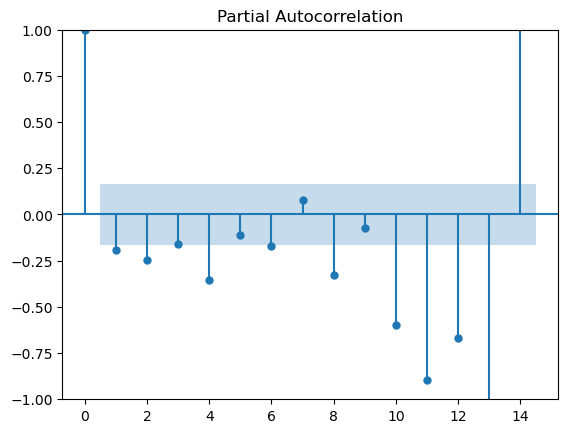

In [27]:
plot_pacf(df['2nd Diff'].dropna(), lags=14)
plt.show()

Excluding the first line as it is reference count the number of markers that are not completely submerged in threshold and are continuous which counts to 4 so
p = 4

##### FInding the q value for the trend

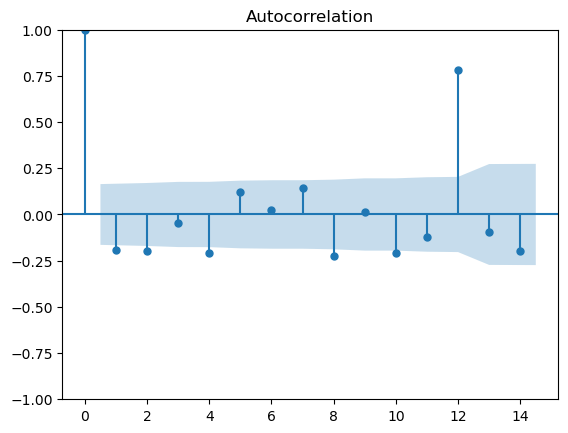

In [28]:
plot_acf(df['2nd Diff'].dropna(), lags = 14)
plt.show()

Excluding the first line as it is reference count the number of markers that are not completely submerged in threshold and are continuous which counts to 2 so
q = 2

#### Calculating P and Q for Seasonality

<function matplotlib.pyplot.show(close=None, block=None)>

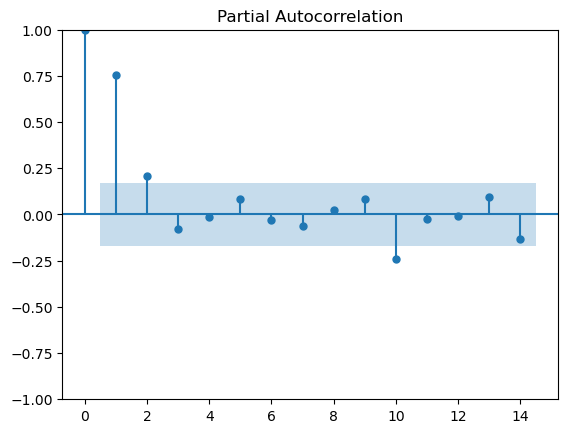

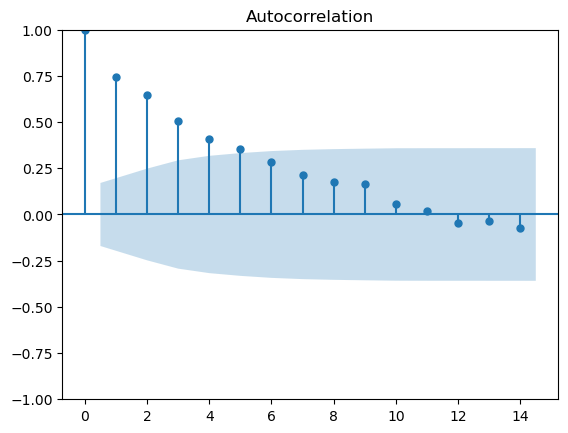

In [52]:
plot_pacf(df['Seasonality'].dropna(), lags = 14)
plot_acf(df['Seasonality'].dropna(), lags=14)
plt.show

As per the above two figures the P and Q value for the Seasonality is 
P = 2
Q = 5

## Building Model using ARIMA

After getting pdq and PDQ values the next step is to build the model by importing ARIMA library

In [30]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [50]:
model = sm.tsa.statespace.SARIMAX(df['Thousands of Passengers'], order = (4,2,2), seasonal_order = (2, 1, 5, 12), enforce_stationarity =False, enforce_invertibility=False)

C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [51]:
result = model.fit()
print(result.summary())

C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                            SARIMAX Results                                             
Dep. Variable:                          Thousands of Passengers   No. Observations:                  144
Model:             SARIMAX(4, 2, 2)x(2, 1, [1, 2, 3, 4, 5], 12)   Log Likelihood                -263.156
Date:                                          Mon, 02 Oct 2023   AIC                            554.312
Time:                                                  00:52:48   BIC                            585.177
Sample:                                              01-01-1949   HQIC                           566.525
                                                   - 12-01-1960                                         
Covariance Type:                                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar

Checking all the values manually for Q as per the output above [1,2,3,4,5] and choosing the model based on the least AIC score fro the respective value of Q

In [33]:
model = sm.tsa.statespace.SARIMAX(df['Thousands of Passengers'], order= (4,2,2), seasonal_order=(2, 1, 4, 12))

C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [34]:
result = model.fit()
print(result.summary())

C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                           SARIMAX Results                                           
Dep. Variable:                       Thousands of Passengers   No. Observations:                  144
Model:             SARIMAX(4, 2, 2)x(2, 1, [1, 2, 3, 4], 12)   Log Likelihood                -497.020
Date:                                       Sun, 01 Oct 2023   AIC                           1020.040
Time:                                               01:17:32   BIC                           1057.318
Sample:                                           01-01-1949   HQIC                          1035.187
                                                - 12-01-1960                                         
Covariance Type:                                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3730     

In [35]:
model = sm.tsa.statespace.SARIMAX(df['Thousands of Passengers'], order = (4,2,2), seasonal_order = (2, 1, 3, 12))

C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [36]:
result = model.fit()
print(result.summary())

C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                    Thousands of Passengers   No. Observations:                  144
Model:             SARIMAX(4, 2, 2)x(2, 1, [1, 2, 3], 12)   Log Likelihood                -497.173
Date:                                    Sun, 01 Oct 2023   AIC                           1018.346
Time:                                            01:17:40   BIC                           1052.756
Sample:                                        01-01-1949   HQIC                          1032.328
                                             - 12-01-1960                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3699      0.098    -14.040      0

In [37]:
model = sm.tsa.statespace.SARIMAX(df['Thousands of Passengers'], order = (4,2,2), seasonal_order=(2,1,2,12))

C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [38]:
result = model.fit()
print(result.summary())

C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:            Thousands of Passengers   No. Observations:                  144
Model:             SARIMAX(4, 2, 2)x(2, 1, 2, 12)   Log Likelihood                -497.783
Date:                            Sun, 01 Oct 2023   AIC                           1017.566
Time:                                    01:17:44   BIC                           1049.109
Sample:                                01-01-1949   HQIC                          1030.383
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3575      0.099    -13.697      0.000      -1.552      -1.163
ar.L2         -0.4916      0.145   

In [39]:
model1 = sm.tsa.statespace.SARIMAX(df['Thousands of Passengers'], order = (0, 1, 1), seasonal_order =(0, 1, 1, 12))

C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [40]:
result1 = model.fit()
print(result1.summary())

                                     SARIMAX Results                                      
Dep. Variable:            Thousands of Passengers   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -507.501
Date:                            Sun, 01 Oct 2023   AIC                           1021.003
Time:                                    01:17:44   BIC                           1029.628
Sample:                                01-01-1949   HQIC                          1024.507
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3087      0.068     -4.507      0.000      -0.443      -0.174
ma.S.L12      -0.1075      0.091   

In [41]:
# Model:SARIMAX(4, 2, 2)x(2, 1,  5, 12)        AIC   1021.456
# Model:SARIMAX(4, 2, 2)x(2, 1,  4, 12)        AIC   1020.040
# Model:SARIMAX(4, 2, 2)x(2, 1,  3, 12)        AIC   1018.346
# Model:SARIMAX(4, 2, 2)x(2, 1,  2, 12)        AIC   1017.566
# Model:SARIMAX(4, 2, 2)x(2, 1,  1, 12)        AIC   1015.568

In [ ]:
# Using the looping fuction to improve the AIC for  enhancing the precidtion values

In [42]:
import itertools

p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

print("Few Parameter combinations are :")
print('{} x {}'.format(pdq[1],seasonal_pdq[1]))
print('{} x {}'.format(pdq[2],seasonal_pdq[2]))

Few Parameter combinations are :
(0, 0, 1) x (0, 0, 1, 12)
(0, 1, 0) x (0, 1, 0, 12)


In [43]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(df['Thousands of Passengers'],order =param, seasonal_order = param_seasonal,
                                             enforce_stationarity=False, enforce_invertibility=False )
            result = model. fit()
            print("ARIMA {}x{} - AIC{}".format(param, param_seasonal, result.aic))
        except:
            continue

ARIMA (0, 0, 0)x(0, 0, 0, 12) - AIC2044.4329486427587


C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.w

ARIMA (0, 0, 0)x(0, 0, 1, 12) - AIC1887.205265320894
ARIMA (0, 0, 0)x(0, 1, 0, 12) - AIC1315.9211929474204
ARIMA (0, 0, 0)x(0, 1, 1, 12) - AIC1156.291490150854
ARIMA (0, 0, 0)x(1, 0, 0, 12) - AIC1118.6259190717344
ARIMA (0, 0, 0)x(1, 0, 1, 12) - AIC1107.2562043239627
ARIMA (0, 0, 0)x(1, 1, 0, 12) - AIC1109.2437994445113


C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

ARIMA (0, 0, 0)x(1, 1, 1, 12) - AIC1033.6172166730128
ARIMA (0, 0, 1)x(0, 0, 0, 12) - AIC1846.0789377571673


C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 0, 1)x(0, 0, 1, 12) - AIC1567.9916312318744
ARIMA (0, 0, 1)x(0, 1, 0, 12) - AIC1196.9983614399844


C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 0, 1)x(0, 1, 1, 12) - AIC1072.1382984044296
ARIMA (0, 0, 1)x(1, 0, 0, 12) - AIC1071.002681009004


C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 0, 1)x(1, 0, 1, 12) - AIC1049.580141784364
ARIMA (0, 0, 1)x(1, 1, 0, 12) - AIC1059.511222329045


C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 0, 1)x(1, 1, 1, 12) - AIC985.334647803284
ARIMA (0, 1, 0)x(0, 0, 0, 12) - AIC1405.0006612949667
ARIMA (0, 1, 0)x(0, 0, 1, 12) - AIC1194.7130010979668
ARIMA (0, 1, 0)x(0, 1, 0, 12) - AIC1024.4816429833895
ARIMA (0, 1, 0)x(0, 1, 1, 12) - AIC937.7995265380566


C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

ARIMA (0, 1, 0)x(1, 0, 0, 12) - AIC1031.4838983661916
ARIMA (0, 1, 0)x(1, 0, 1, 12) - AIC1015.0000347579846
ARIMA (0, 1, 0)x(1, 1, 0, 12) - AIC944.487630115844


C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

ARIMA (0, 1, 0)x(1, 1, 1, 12) - AIC939.7984372654385
ARIMA (0, 1, 1)x(0, 0, 0, 12) - AIC1379.4417180072915
ARIMA (0, 1, 1)x(0, 0, 1, 12) - AIC1181.6309458759179


C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

ARIMA (0, 1, 1)x(0, 1, 0, 12) - AIC1006.7919047398307
ARIMA (0, 1, 1)x(0, 1, 1, 12) - AIC920.6308317604687


C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 1, 1)x(1, 0, 0, 12) - AIC1014.2239031825333


C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 1, 1)x(1, 0, 1, 12) - AIC985.1362335418708
ARIMA (0, 1, 1)x(1, 1, 0, 12) - AIC934.797542574909


C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 1, 1)x(1, 1, 1, 12) - AIC920.3192974989056
ARIMA (1, 0, 0)x(0, 0, 0, 12) - AIC1415.9068815931885


C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 0)x(0, 0, 1, 12) - AIC1205.390778617259
ARIMA (1, 0, 0)x(0, 1, 0, 12) - AIC1029.9773091700768
ARIMA (1, 0, 0)x(0, 1, 1, 12) - AIC944.385492153316


C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

ARIMA (1, 0, 0)x(1, 0, 0, 12) - AIC1017.3155493571253


C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 0)x(1, 0, 1, 12) - AIC1007.0272556072533
ARIMA (1, 0, 0)x(1, 1, 0, 12) - AIC944.0441660826582


C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 0)x(1, 1, 1, 12) - AIC945.4400866888093
ARIMA (1, 0, 1)x(0, 0, 0, 12) - AIC1390.4515018414895


C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 1)x(0, 0, 1, 12) - AIC1192.2949631619458
ARIMA (1, 0, 1)x(0, 1, 0, 12) - AIC1014.2547824626172


C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 1)x(0, 1, 1, 12) - AIC929.4329707892198
ARIMA (1, 0, 1)x(1, 0, 0, 12) - AIC1009.5891017291615


C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 1)x(1, 0, 1, 12) - AIC989.1764739083847
ARIMA (1, 0, 1)x(1, 1, 0, 12) - AIC935.8163348218454


C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 1)x(1, 1, 1, 12) - AIC935.9152860558958
ARIMA (1, 1, 0)x(0, 0, 0, 12) - AIC1392.9437938537153
ARIMA (1, 1, 0)x(0, 0, 1, 12) - AIC1190.5342929076205
ARIMA (1, 1, 0)x(0, 1, 0, 12) - AIC1013.3680449838096


C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

ARIMA (1, 1, 0)x(0, 1, 1, 12) - AIC928.1312837305568
ARIMA (1, 1, 0)x(1, 0, 0, 12) - AIC1007.6496486406907


C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 1, 0)x(1, 0, 1, 12) - AIC995.4636249453454
ARIMA (1, 1, 0)x(1, 1, 0, 12) - AIC927.5904374710274


C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 1, 0)x(1, 1, 1, 12) - AIC928.1418620185459
ARIMA (1, 1, 1)x(0, 0, 0, 12) - AIC1377.292685893079


C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 1, 1)x(0, 0, 1, 12) - AIC1185.3340359695417
ARIMA (1, 1, 1)x(0, 1, 0, 12) - AIC1008.55288134838


C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 1, 1)x(0, 1, 1, 12) - AIC922.4148960116331
ARIMA (1, 1, 1)x(1, 0, 0, 12) - AIC1009.1896100681414


C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 1, 1)x(1, 0, 1, 12) - AIC987.1339264661831
ARIMA (1, 1, 1)x(1, 1, 0, 12) - AIC929.5756208330575


C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skmis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 1, 1)x(1, 1, 1, 12) - AIC922.2053774352069


#### ARIMA (0, 1, 1)x(0, 1, 1, 12) - AIC920.6308317604687   -- loop model

#### Model:SARIMAX(4, 2, 2)x(2, 1,  1, 12) AIC   1015.568  -- manual approach using each iteration

In [45]:
len(df)

144

In [46]:
# Training and testing with the given dataset

In [47]:
# Training the dataset

df['Forecast'] = result.predict(start=130, end=144, dynamic=True)

In [48]:
df

,Thousands of Passengers,1st Diff,2nd Diff,Seasonality,Forecast
Month,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN,NaN
1949-03-01,132,14.0,8.0,NaN,NaN
1949-04-01,129,-3.0,-17.0,NaN,NaN
1949-05-01,121,-8.0,-5.0,NaN,NaN
...,...,...,...,...,...
1960-08-01,606,-16.0,-103.0,47.0,602.189421
1960-09-01,508,-98.0,-82.0,45.0,503.349383
1960-10-01,461,-47.0,51.0,54.0,449.827224


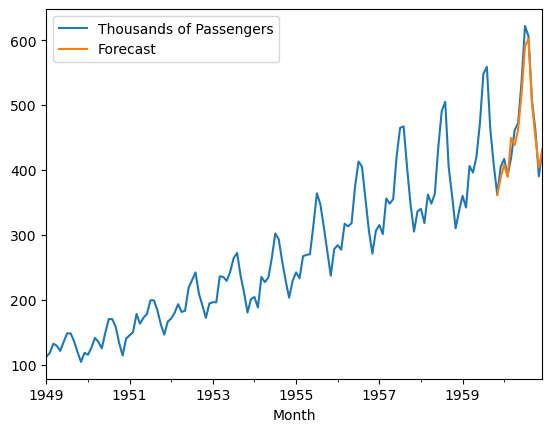

In [49]:
df[['Thousands of Passengers','Forecast']].plot()
plt.show()

###### The Forecast and the actual data has low variance or can be said the predicted value is very close to the actual value

### Prediction for future 5 years

In [53]:
from pandas.tseries.offsets import DateOffset

In [57]:
# Creating a dataframe for next 5 years to make predictions on unseen data
future_date = [df.index[-1] + DateOffset(months=x) for x in range(0,61)]
future_date

[Timestamp('1960-12-01 00:00:00'),
 Timestamp('1961-01-01 00:00:00'),
 Timestamp('1961-02-01 00:00:00'),
 Timestamp('1961-03-01 00:00:00'),
 Timestamp('1961-04-01 00:00:00'),
 Timestamp('1961-05-01 00:00:00'),
 Timestamp('1961-06-01 00:00:00'),
 Timestamp('1961-07-01 00:00:00'),
 Timestamp('1961-08-01 00:00:00'),
 Timestamp('1961-09-01 00:00:00'),
 Timestamp('1961-10-01 00:00:00'),
 Timestamp('1961-11-01 00:00:00'),
 Timestamp('1961-12-01 00:00:00'),
 Timestamp('1962-01-01 00:00:00'),
 Timestamp('1962-02-01 00:00:00'),
 Timestamp('1962-03-01 00:00:00'),
 Timestamp('1962-04-01 00:00:00'),
 Timestamp('1962-05-01 00:00:00'),
 Timestamp('1962-06-01 00:00:00'),
 Timestamp('1962-07-01 00:00:00'),
 Timestamp('1962-08-01 00:00:00'),
 Timestamp('1962-09-01 00:00:00'),
 Timestamp('1962-10-01 00:00:00'),
 Timestamp('1962-11-01 00:00:00'),
 Timestamp('1962-12-01 00:00:00'),
 Timestamp('1963-01-01 00:00:00'),
 Timestamp('1963-02-01 00:00:00'),
 Timestamp('1963-03-01 00:00:00'),
 Timestamp('1963-04-

In [59]:
future_date_df = pd.DataFrame(index = future_date[1:], columns = df.columns)

In [61]:
# Adding the newly created 5years data with main dataset with same columns

final_forecasting_dataset = pd.concat([df,future_date_df])

In [64]:
final_forecasting_dataset.tail()

,Thousands of Passengers,1st Diff,2nd Diff,Seasonality,Forecast
1965-08-01,NaN,NaN,NaN,NaN,NaN
1965-09-01,NaN,NaN,NaN,NaN,NaN
1965-10-01,NaN,NaN,NaN,NaN,NaN
1965-11-01,NaN,NaN,NaN,NaN,NaN
1965-12-01,NaN,NaN,NaN,NaN,NaN


In [70]:
# Predicting for the next 5years

final_forecasting_dataset['Forecast'] = result.predict(start=144,end=204,dynamic=True)

In [71]:
final_forecasting_dataset.tail()

,Thousands of Passengers,1st Diff,2nd Diff,Seasonality,Forecast
1965-08-01,NaN,NaN,NaN,NaN,866.938824
1965-09-01,NaN,NaN,NaN,NaN,766.456015
1965-10-01,NaN,NaN,NaN,NaN,722.785318
1965-11-01,NaN,NaN,NaN,NaN,641.979232
1965-12-01,NaN,NaN,NaN,NaN,687.622570


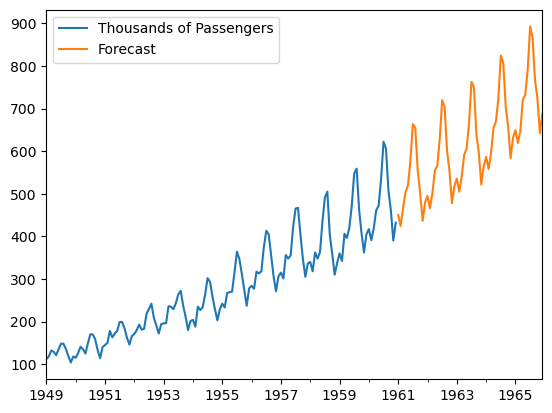

In [67]:
# Plot for seen and unseen datasets
final_forecasting_dataset[['Thousands of Passengers','Forecast']].plot()
plt.show()

In [68]:
# To save the predicted dataset in local system

final_forecasting_dataset.to_csv('final_forecasting_Dataset.csv')